In [52]:
from question_4 import *
# from datetime import datetime

The absolute value of the error is taken because the distance between the prediction and the true value matters, while the sign of the error does not.

In [53]:
def plot_and_save_to_file(circuit_no):
    # This line is the reason it takes about 20 seconds (on my PC).
    my_data = get_sensitivity_and_error_data(circuit_no, absolute_error=True)
    
    plot = my_data.plot(
        x=SENSITIVITY_COLUMN_HEADING + ' ' + circuit_no,
        y='error',
        style='.',
        xlabel=SENSITIVITY_COLUMN_HEADING,
        ylabel='Error ε(t)',
        legend=False,
        title='Circuit ' + circuit_no
    )
    plot_file_path = Path('graphs', 'error_vs_sensitivity', circuit_no + '.png')
    plot.get_figure().savefig(plot_file_path)

Making a plot for just one circuit.

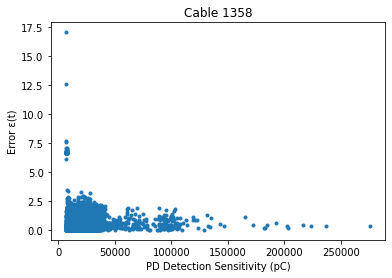

In [54]:
circuit_no = get_circuit_nos()[0]
plot_and_save_to_file(circuit_no)

# Plots for all circuits
(On my PC) the below cell takes 4.5 minutes to complete. Errors (exceptions) are encountered for circuits 2003, 20049, 20726, 2821. I have not yet explored these exceptions.

Encountered error. Circuit number = 2003
Encountered error. Circuit number = 20049
Encountered error. Circuit number = 20726
Encountered error. Circuit number = 2821


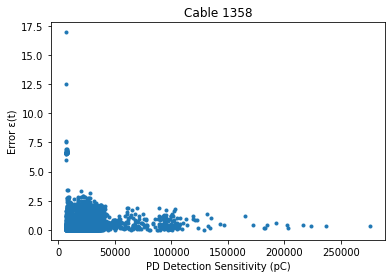

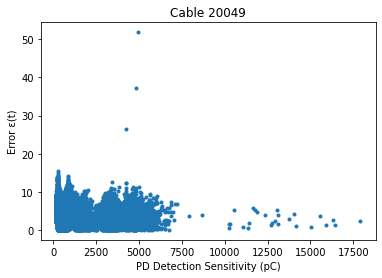

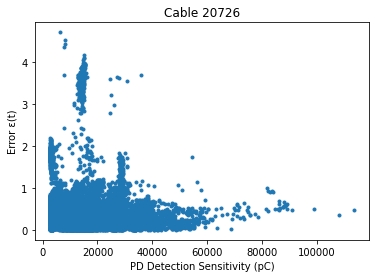

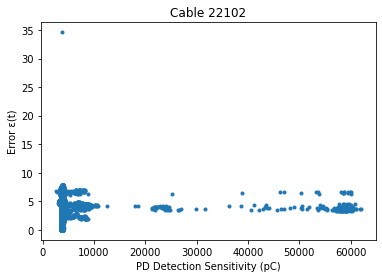

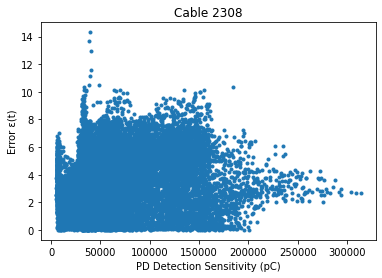

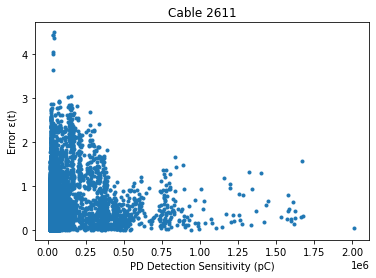

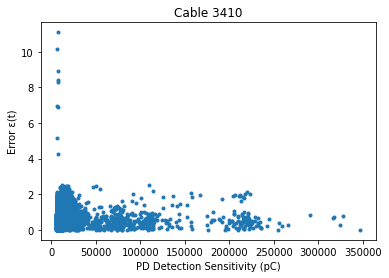

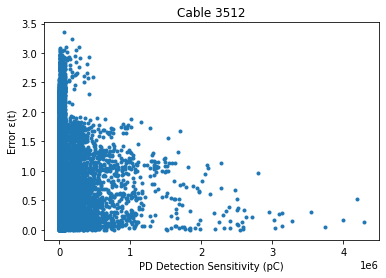

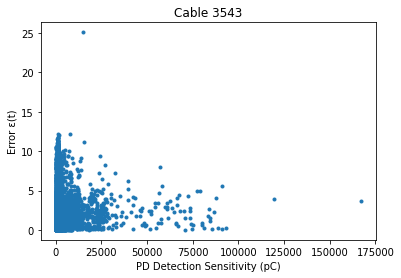

In [56]:
for circuit_no in get_circuit_nos():
    try:
        plot_and_save_to_file(circuit_no)
    except:
        print('Encountered error. Circuit number =', circuit_no)

Exploring the data a bit (for only one circuit).

In [35]:
circuit_no = get_circuit_nos()[0]
# "sst" = "sensitivity"
sst_data = get_sensitivity_data(circuit_no)

In [33]:
threshold = 1000
sst_data_filtered = sst_data.apply(lambda x: True if x <= threshold else False)
n_small_values = len(sst_data_filtered[sst_data_filtered == True].index)
print('Number of sensitivity values <=', threshold, 'is:', n_small_values)

Number of sensitivity values <= 1000 is: 0


In [37]:
# Unimportant.
sst_data_filtered = sst_data.apply(lambda x: True if 200000 <= x <= 250000 else False)
n_small_values = len(sst_data_filtered[sst_data_filtered == True].index)
print('Number of sensitivity values in [200000, 250000] is:', n_small_values)

Number of sensitivity values in [200000, 250000] is: 8
